In [124]:
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv("data/Churn.csv")

In [126]:
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score
  
import warnings
warnings.filterwarnings('ignore')

In [127]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

In [129]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [130]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [131]:
df.dropna(inplace=True)

In [132]:
df.drop('customerID', axis=1, inplace=True)

In [133]:
print(df.describe().T)

                 count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80  


In [134]:
for col in df.columns: 
    if df[col].dtype != 'int64' and df[col].dtype != 'float64': print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [135]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

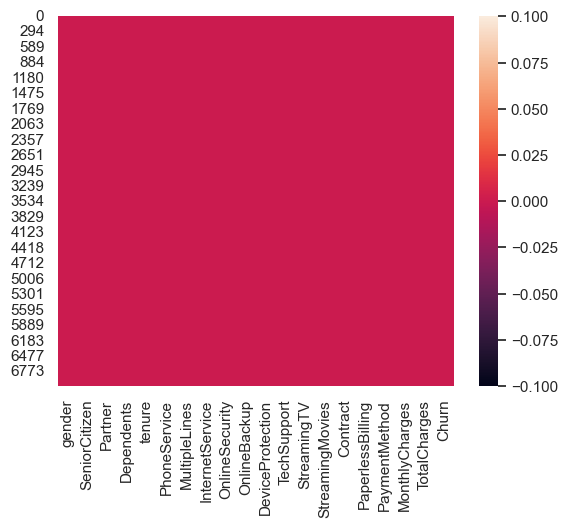

In [ ]:
sns.heatmap(df.isnull())

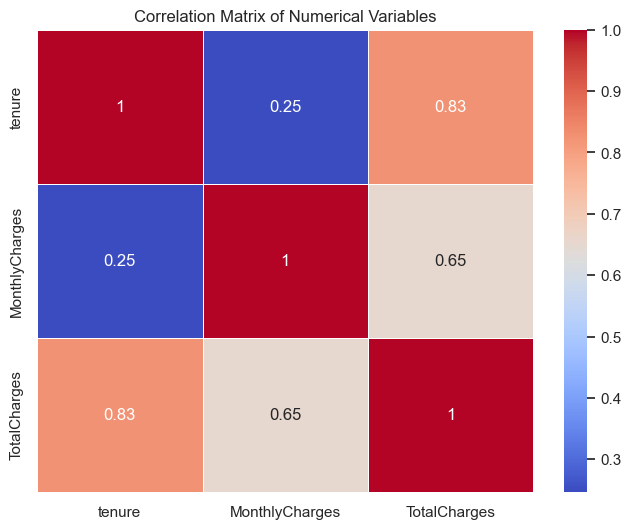

In [ ]:
# Korelasyon matrisi ve heatmap
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')
corr = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.savefig('correlation_matrix.png')
plt.show()


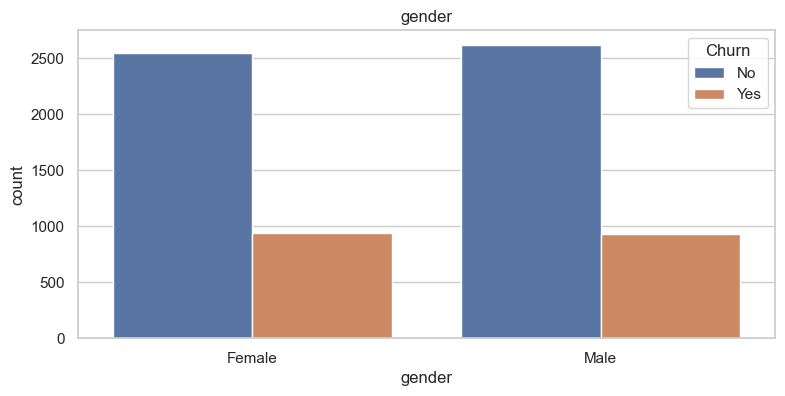

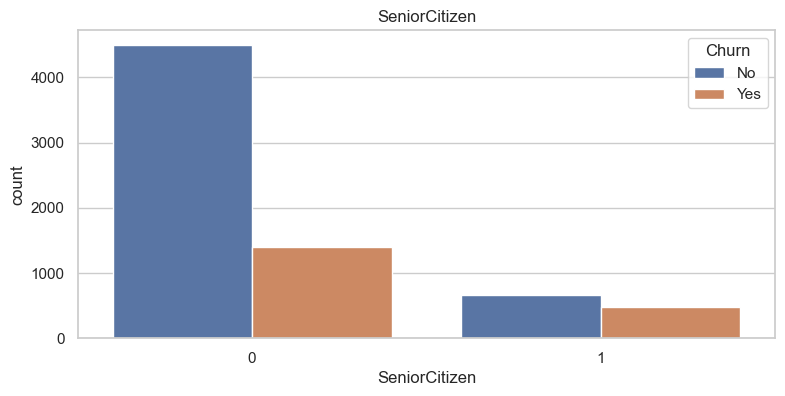

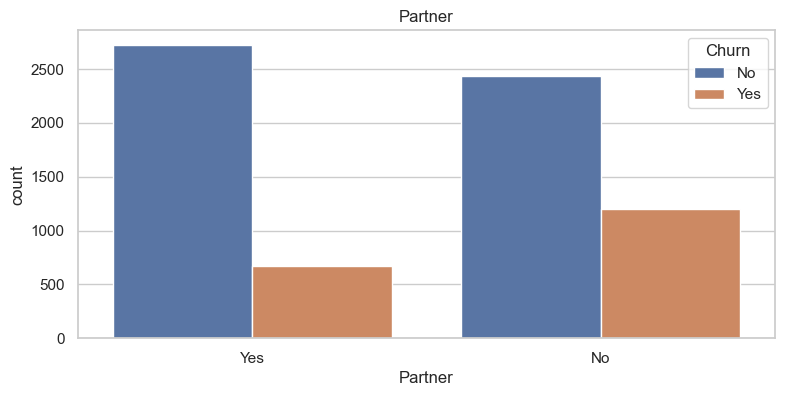

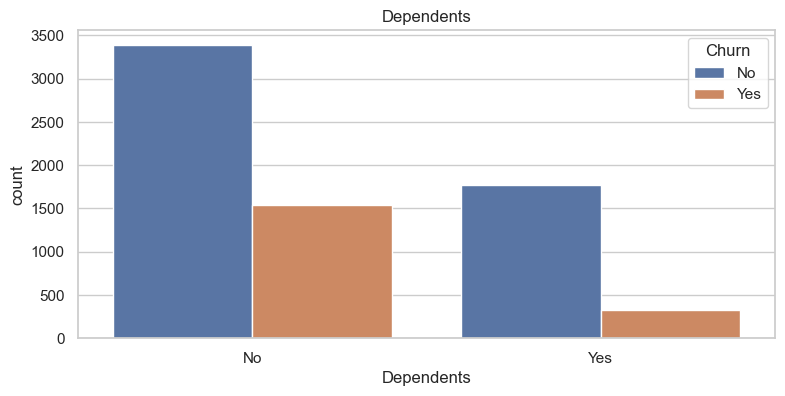

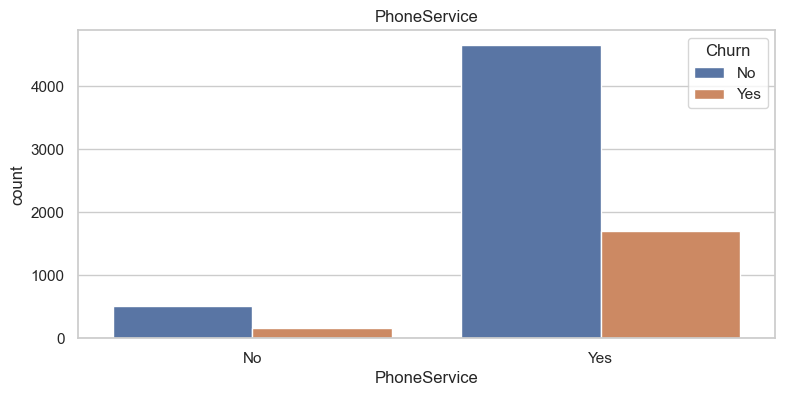

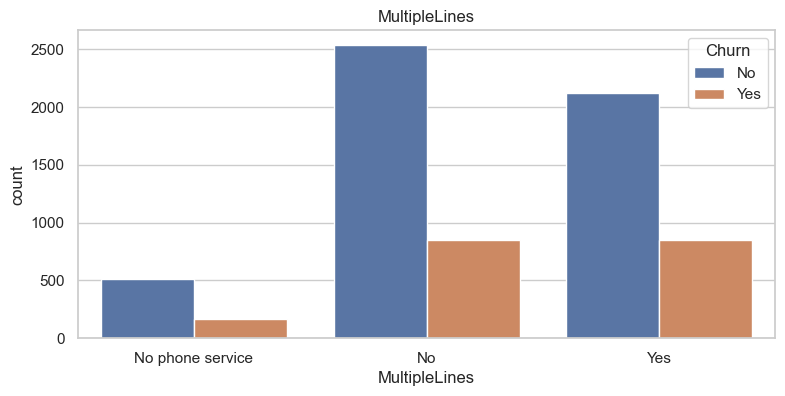

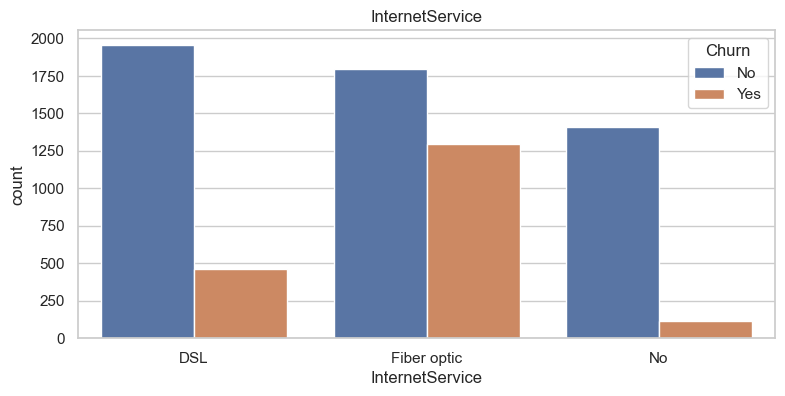

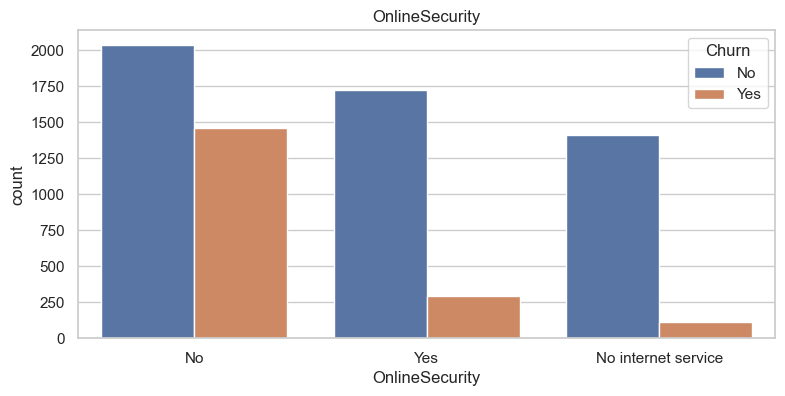

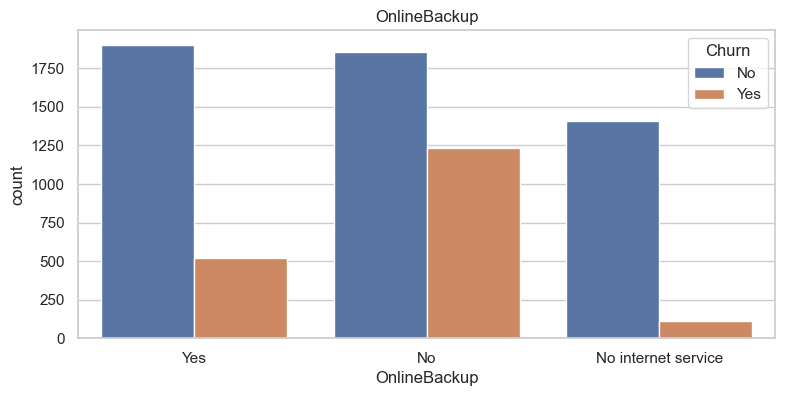

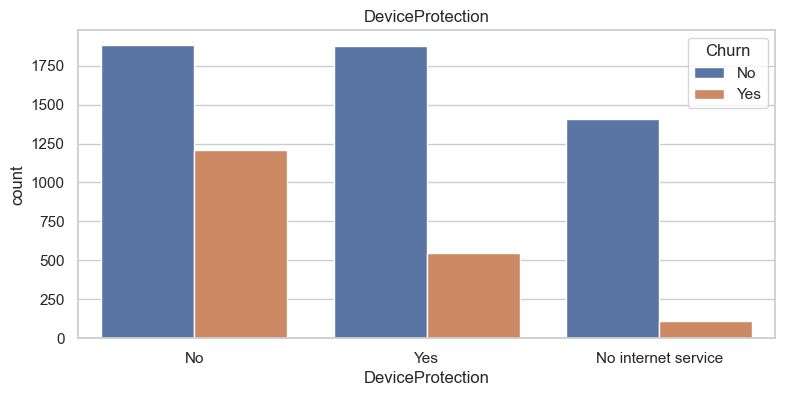

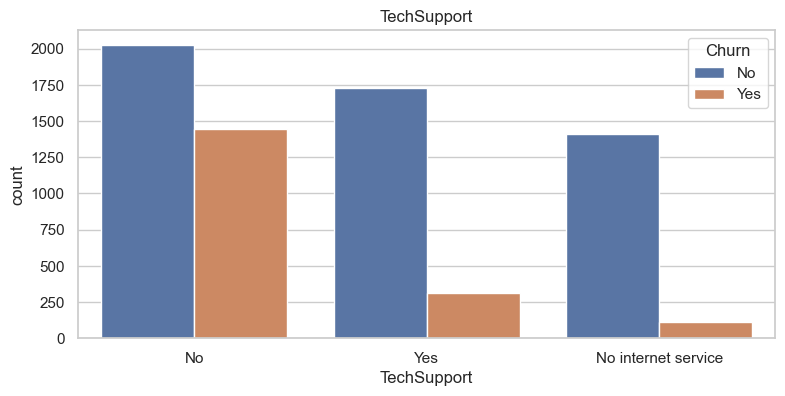

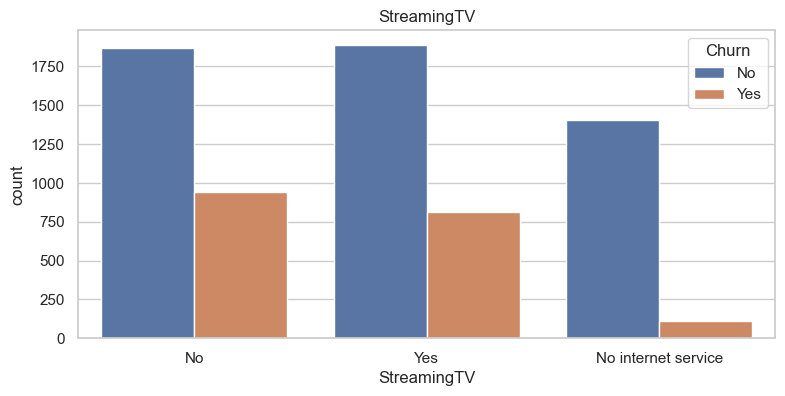

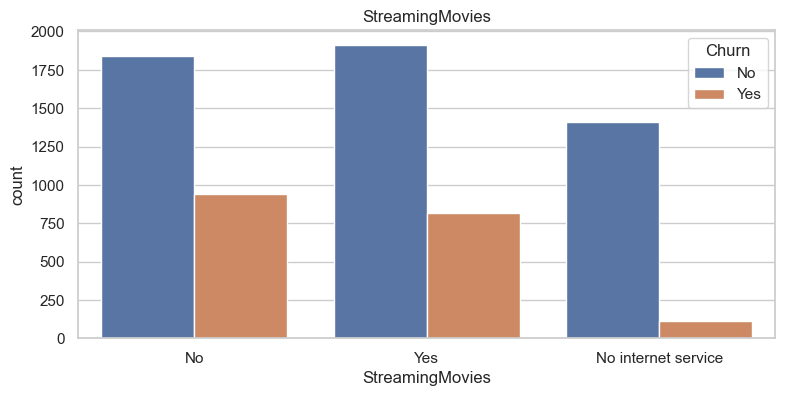

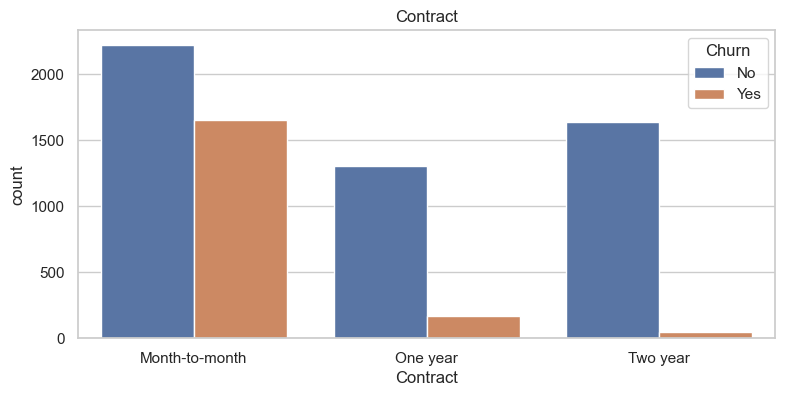

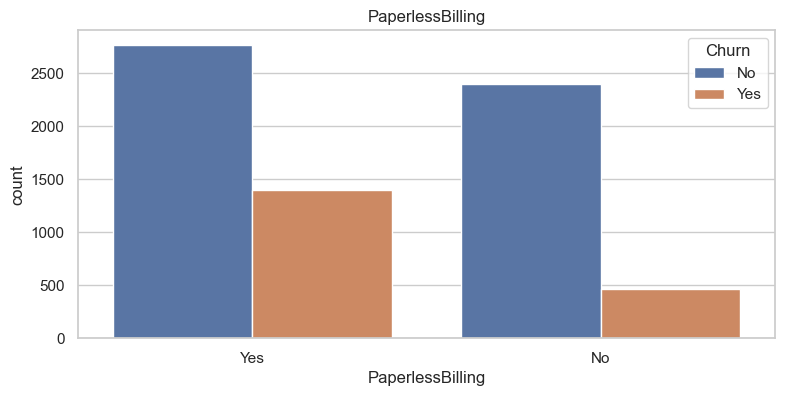

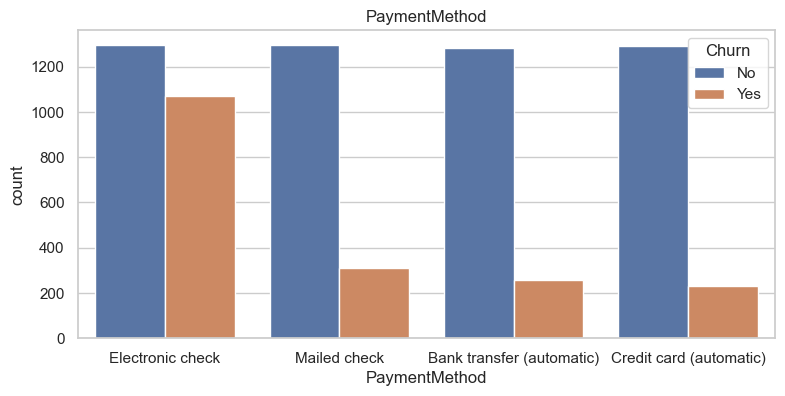

In [ ]:
# Her bir kategorik değişken için, Churn ile nasıl bir ilişki olduğunu görsel olarak analiz etmek
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(9, 4))
    sns.countplot(data=df, x=predictor, hue='Churn')
    plt.title(predictor)
    plt.savefig('categorical_features_churn.png')
    plt.show()

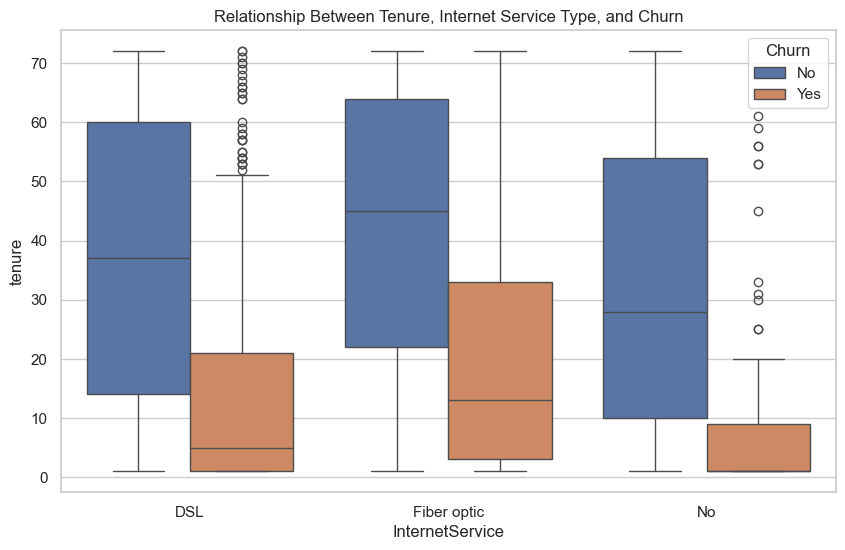

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='InternetService', y='tenure', hue='Churn')
plt.title('Relationship Between Tenure, Internet Service Type, and Churn')
plt.savefig('relationship_between_tenure_intservice_churn.png')
plt.show()


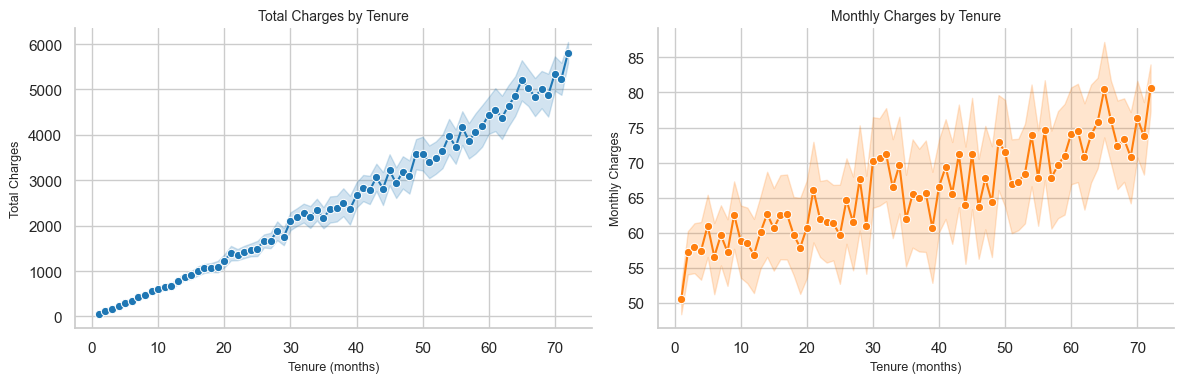

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gerekirse TotalCharges sayısal olsun
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Stil: beyaz gridli
sns.set_style("whitegrid")

# Şekil ve eksenleri tanımla (2 grafik yan yana)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- Sol grafik: TotalCharges by Tenure ---
sns.lineplot(data=df, x='tenure', y='TotalCharges', color='#1f77b4',
             linewidth=1.5, marker='o', ax=axes[0])
axes[0].set_title('Total Charges by Tenure', fontsize=10)
axes[0].set_xlabel('Tenure (months)', fontsize=9)
axes[0].set_ylabel('Total Charges', fontsize=9)
sns.despine(ax=axes[0])  # kenarlıkları kaldır

# --- Sağ grafik: MonthlyCharges by Tenure ---
sns.lineplot(data=df, x='tenure', y='MonthlyCharges', color='#ff7f0e',
             linewidth=1.5, marker='o', ax=axes[1])
axes[1].set_title('Monthly Charges by Tenure', fontsize=10)
axes[1].set_xlabel('Tenure (months)', fontsize=9)
axes[1].set_ylabel('Monthly Charges', fontsize=9)
sns.despine(ax=axes[1])  # kenarlıkları kaldır

# Yerleşimi düzenle
plt.tight_layout()

# Tek dosyada kaydet
plt.savefig('charges_by_tenure.png', dpi=100)

# Göster
plt.show()


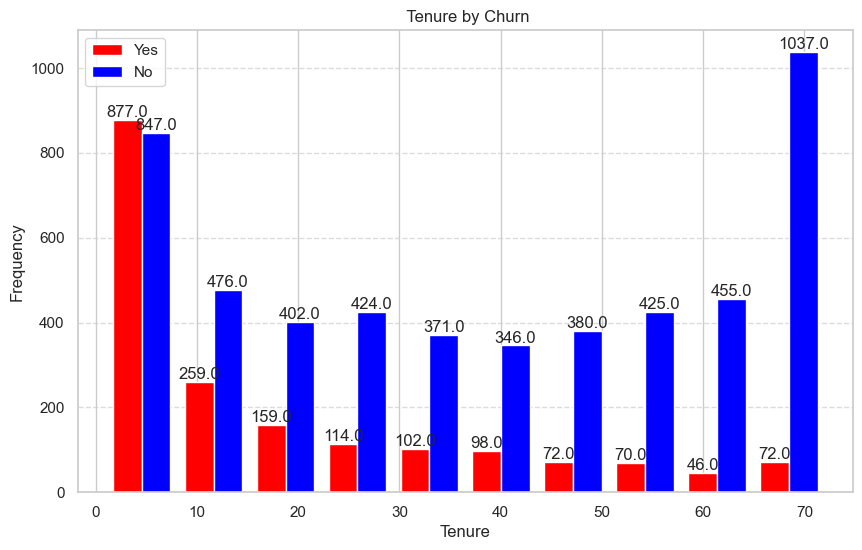

In [ ]:
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
plt.savefig('tenure_by_churn.png')


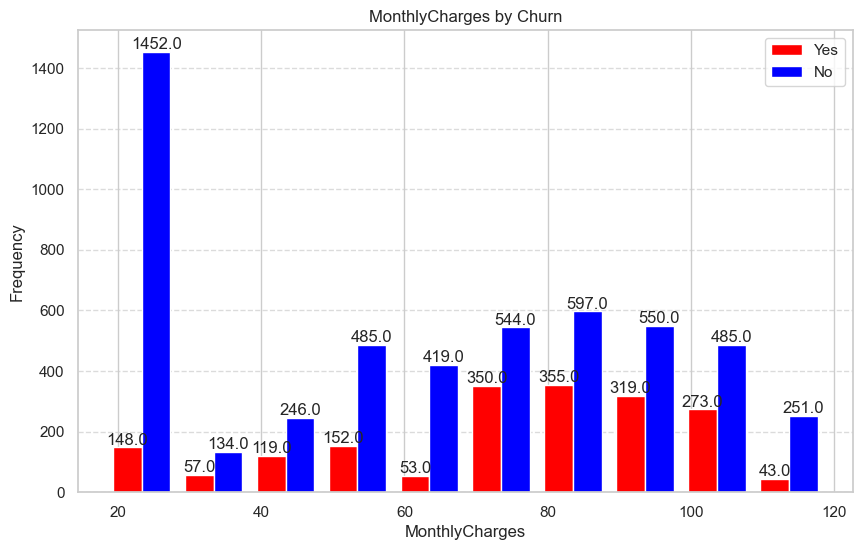

In [ ]:
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Barların üstüne değer yazma
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
plt.savefig('monthly_charges_by_churn.png')


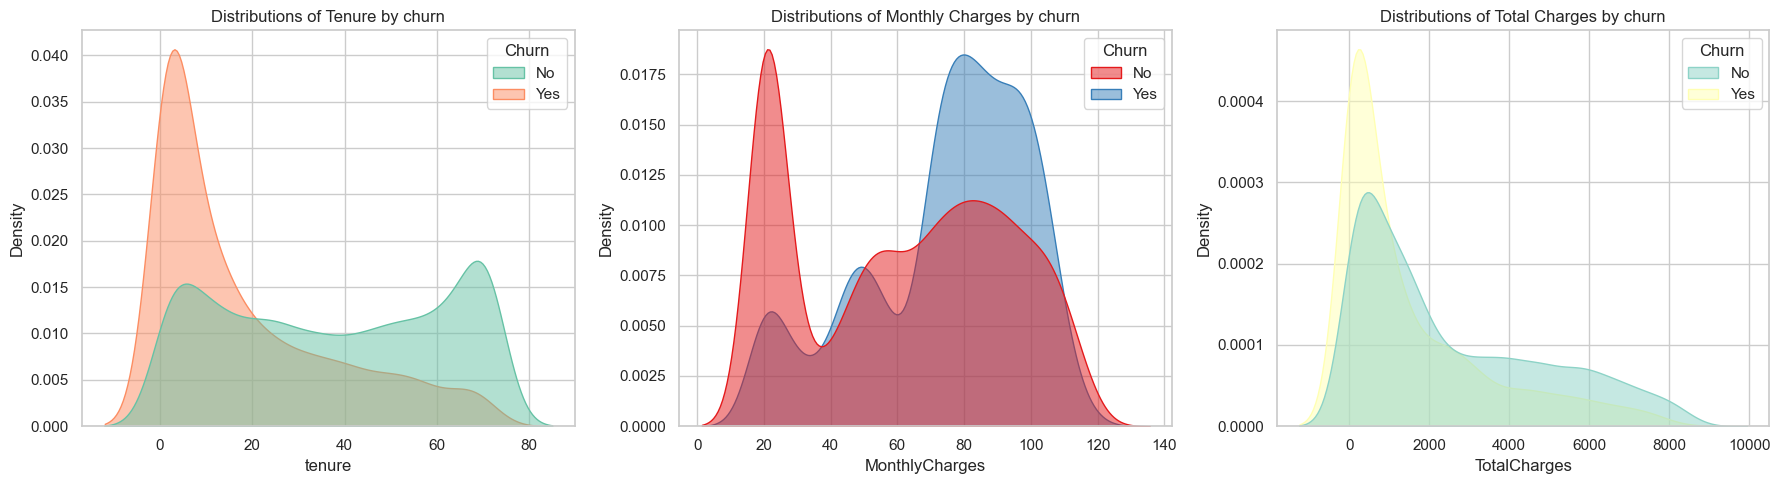

In [ ]:
# Stil ayarı
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# tenure için KDE
plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True, common_norm=False, palette="Set2", alpha=0.5)
plt.title("Distributions of Tenure by churn")

# MonthlyCharges için KDE
plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("Distributions of Monthly Charges by churn")

# TotalCharges için KDE
plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, common_norm=False, palette="Set3", alpha=0.5)
plt.title("Distributions of Total Charges by churn")

plt.savefig('tenure_monthly_totalcharges_distribution.png') 
plt.tight_layout()
plt.show()

In [144]:
categorical_cols = df.select_dtypes(include=['category', 'object']).columns 
encoder = OneHotEncoder(sparse_output=False) 
encoded_data = encoder.fit_transform(df[categorical_cols]) 
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols)) 
df.drop(columns=categorical_cols, inplace=True) 
df.reset_index(drop=True, inplace=True) 
df = pd.concat([df, encoded_df], axis=1)

In [145]:
df.drop('Churn_No', axis=1, inplace=True) 
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [146]:
X = df.drop('Churn', axis=1) 
y = df['Churn']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_scores = []

models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Naive Bayes', GaussianNB(), {})
]

best_model = None
best_accuracy = 0.0

for name, model, param_grid in models:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# En iyi modeli ve sonuçları
import pandas as pd
scores_df = pd.DataFrame(model_scores).sort_values(by='Accuracy', ascending=False)
print("Tüm Modellerin Performansları:\n", scores_df)

print("\nEn İyi Model:")
print(f"Test Accuracy: {best_accuracy:.4f}")
print(best_model)


Model: Random Forest
Accuracy: 0.7896
Precision: 0.7792
Recall: 0.7896
F1 Score: 0.7816

Model: Gradient Boosting
Accuracy: 0.7967
Precision: 0.7865
Recall: 0.7967
F1 Score: 0.7882

Model: Support Vector Machine
Accuracy: 0.7420
Precision: 0.7902
Recall: 0.7420
F1 Score: 0.7542

Model: Logistic Regression
Accuracy: 0.7520
Precision: 0.8023
Recall: 0.7520
F1 Score: 0.7639

Model: K-Nearest Neighbors
Accuracy: 0.7655
Precision: 0.7621
Recall: 0.7655
F1 Score: 0.7637

Model: Decision Tree
Accuracy: 0.7562
Precision: 0.7556
Recall: 0.7562
F1 Score: 0.7559

Model: Ada Boost
Accuracy: 0.8017
Precision: 0.7912
Recall: 0.8017
F1 Score: 0.7916

Model: XG Boost
Accuracy: 0.7932
Precision: 0.7807
Recall: 0.7932
F1 Score: 0.7795

Model: Naive Bayes
Accuracy: 0.7100
Precision: 0.7962
Recall: 0.7100
F1 Score: 0.7259

Tüm Modellerin Performansları:
                     Model  Accuracy  Precision    Recall  F1 Score
6               Ada Boost  0.801706   0.791250  0.801706  0.791562
1       Gradient Bo

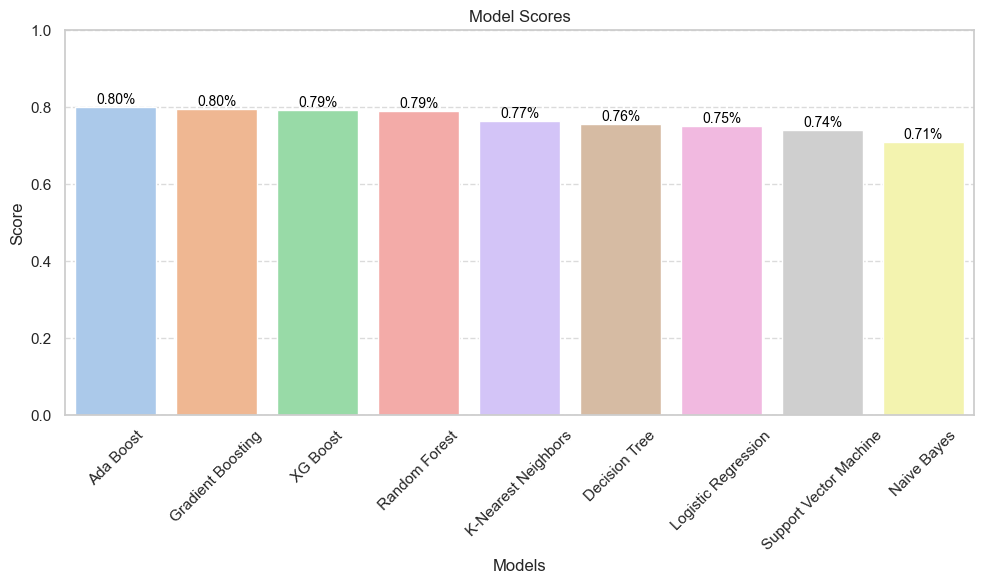

In [ ]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_scores.png')
plt.show()


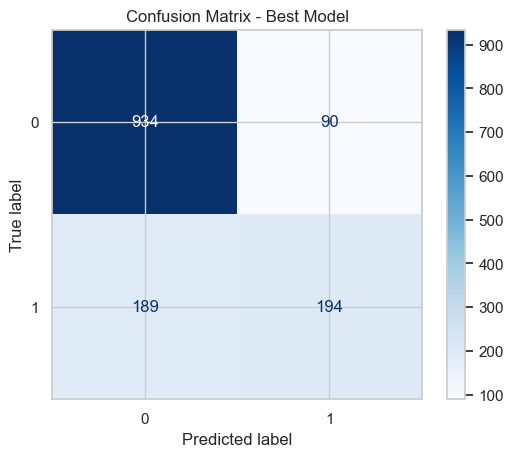

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# En iyi modelin test seti tahminleri
y_pred_best = best_model.predict(X_test)

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_best)

# Confusion matrix görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best Model')
plt.savefig('confudion_matrix.png')
plt.show()


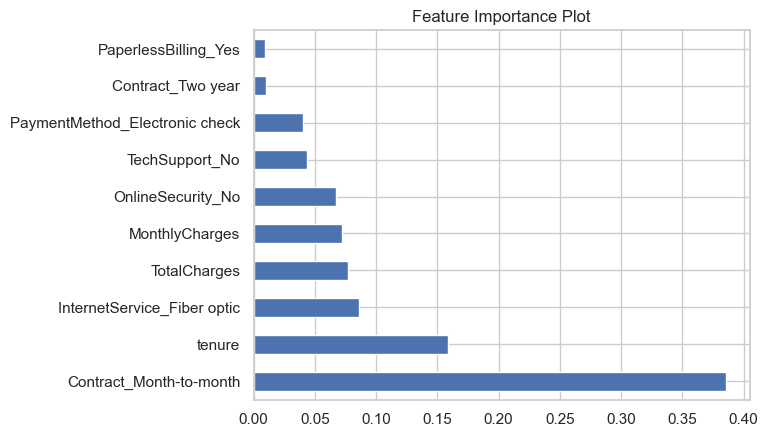

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

df = df.dropna()
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

X = df.drop(['Churn'], axis=1)
X = pd.get_dummies(X)
y = df['Churn']

model = GradientBoostingClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance Plot")
plt.savefig('features_importance.png')
plt.show()


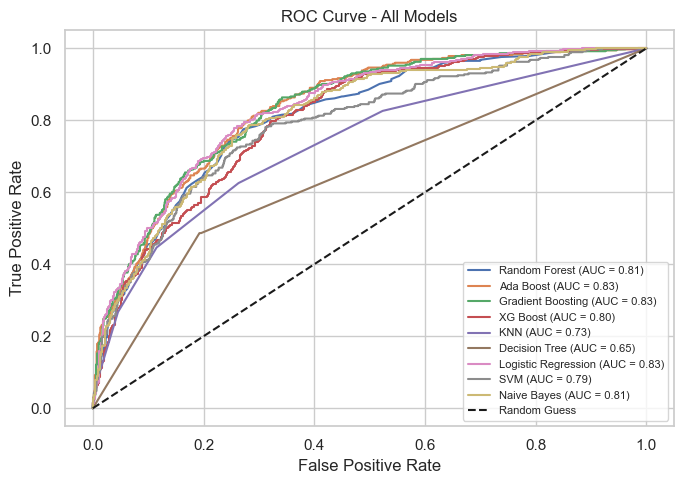

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Eğitim-test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tüm modeller
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Ada Boost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XG Boost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# Küçük boyutlu ROC grafiği
plt.figure(figsize=(7, 5))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Rastgele çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Grafik ayarları
plt.title("ROC Curve - All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8, loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('ROC_curve.png')
plt.show()
